In [1]:
import json

In [2]:
!pip install d2l

In [3]:
from d2l import torch as d2l

In [4]:
with open(r"C:\Users\hp\Downloads\random_sample_mavi_2_gt.json", 'r') as file:
    data = json.load(file)

print(data)

{'images': [{'height': 480, 'width': 640, 'id': 1, 'file_name': '1229.jpg'}, {'height': 480, 'width': 640, 'id': 2, 'file_name': '1234.jpg'}, {'height': 480, 'width': 640, 'id': 3, 'file_name': '1254.jpg'}, {'height': 480, 'width': 640, 'id': 4, 'file_name': '1287.jpg'}, {'height': 480, 'width': 640, 'id': 5, 'file_name': '1292.jpg'}, {'height': 480, 'width': 640, 'id': 6, 'file_name': '1298.jpg'}, {'height': 480, 'width': 640, 'id': 7, 'file_name': '1313.jpg'}, {'height': 480, 'width': 640, 'id': 8, 'file_name': '1335.jpg'}, {'height': 480, 'width': 640, 'id': 9, 'file_name': '1898.jpg'}, {'height': 480, 'width': 640, 'id': 10, 'file_name': '1901.jpg'}, {'height': 480, 'width': 640, 'id': 11, 'file_name': '1904.jpg'}, {'height': 480, 'width': 640, 'id': 12, 'file_name': '1960.jpg'}, {'height': 480, 'width': 640, 'id': 13, 'file_name': '1997.jpg'}, {'height': 480, 'width': 640, 'id': 14, 'file_name': '3237.jpg'}, {'height': 480, 'width': 640, 'id': 15, 'file_name': '3276.jpg'}, {'heigh

In [5]:
data['images']

[{'height': 480, 'width': 640, 'id': 1, 'file_name': '1229.jpg'},
 {'height': 480, 'width': 640, 'id': 2, 'file_name': '1234.jpg'},
 {'height': 480, 'width': 640, 'id': 3, 'file_name': '1254.jpg'},
 {'height': 480, 'width': 640, 'id': 4, 'file_name': '1287.jpg'},
 {'height': 480, 'width': 640, 'id': 5, 'file_name': '1292.jpg'},
 {'height': 480, 'width': 640, 'id': 6, 'file_name': '1298.jpg'},
 {'height': 480, 'width': 640, 'id': 7, 'file_name': '1313.jpg'},
 {'height': 480, 'width': 640, 'id': 8, 'file_name': '1335.jpg'},
 {'height': 480, 'width': 640, 'id': 9, 'file_name': '1898.jpg'},
 {'height': 480, 'width': 640, 'id': 10, 'file_name': '1901.jpg'},
 {'height': 480, 'width': 640, 'id': 11, 'file_name': '1904.jpg'},
 {'height': 480, 'width': 640, 'id': 12, 'file_name': '1960.jpg'},
 {'height': 480, 'width': 640, 'id': 13, 'file_name': '1997.jpg'},
 {'height': 480, 'width': 640, 'id': 14, 'file_name': '3237.jpg'},
 {'height': 480, 'width': 640, 'id': 15, 'file_name': '3276.jpg'},
 {'h

In [6]:
import pandas as pd
df = pd.DataFrame.from_dict(pd.json_normalize(data['images']), orient='columns')

In [7]:
df

,height,width,id,file_name
0,480,640,1,1229.jpg
1,480,640,2,1234.jpg
2,480,640,3,1254.jpg
3,480,640,4,1287.jpg
4,480,640,5,1292.jpg
...,...,...,...,...
194,480,640,195,17156.jpg
195,480,640,196,17526.jpg
196,480,640,197,17645.jpg
197,480,640,198,17677.jpg


In [8]:
df2 = pd.DataFrame.from_dict(pd.json_normalize(data['annotations']), orient='columns')
df2

,iscrowd,image_id,bbox,segmentation,category_id,id,area,ignore,vis_ratio,height
0,0,1,"[297, 262, 12, 33]",[],1,1,396,0,1.0,33
1,0,1,"[296, 263, 12, 31]",[],1,2,372,0,1.0,31
2,0,2,"[346, 265, 12, 33]",[],1,3,396,0,1.0,33
3,0,2,"[344, 265, 12, 32]",[],1,4,384,0,1.0,32
4,0,3,"[608, 286, 21, 21]",[],1,5,441,1,1.0,21
...,...,...,...,...,...,...,...,...,...,...
1366,0,199,"[312, 226, 14, 41]",[],1,1367,574,0,1.0,41
1367,0,199,"[333, 227, 14, 39]",[],1,1368,546,0,1.0,39
1368,0,199,"[344, 225, 14, 40]",[],1,1369,560,0,1.0,40
1369,0,199,"[408, 206, 36, 114]",[],1,1370,4104,0,1.0,114


In [9]:
df_merged = pd.merge(df, df2, left_on = 'id', right_on = 'image_id')
df_merged

,height_x,width,id_x,file_name,iscrowd,image_id,bbox,segmentation,category_id,id_y,area,ignore,vis_ratio,height_y
0,480,640,1,1229.jpg,0,1,"[297, 262, 12, 33]",[],1,1,396,0,1.0,33
1,480,640,1,1229.jpg,0,1,"[296, 263, 12, 31]",[],1,2,372,0,1.0,31
2,480,640,2,1234.jpg,0,2,"[346, 265, 12, 33]",[],1,3,396,0,1.0,33
3,480,640,2,1234.jpg,0,2,"[344, 265, 12, 32]",[],1,4,384,0,1.0,32
4,480,640,3,1254.jpg,0,3,"[608, 286, 21, 21]",[],1,5,441,1,1.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,480,640,199,17679.jpg,0,199,"[312, 226, 14, 41]",[],1,1367,574,0,1.0,41
1367,480,640,199,17679.jpg,0,199,"[333, 227, 14, 39]",[],1,1368,546,0,1.0,39
1368,480,640,199,17679.jpg,0,199,"[344, 225, 14, 40]",[],1,1369,560,0,1.0,40
1369,480,640,199,17679.jpg,0,199,"[408, 206, 36, 114]",[],1,1370,4104,0,1.0,114


In [10]:
# # lambda x: x = f"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\Pedestrian_dataset_for_internship_assignment\{x}"
# df_merged = df_merged.assign(file_name = lambda x: f"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\Pedestrian_dataset_for_internship_assignment\{x}")

In [11]:
import cv2
import matplotlib.pyplot as plt

In [12]:
def bbox_to_rect(bbox, color):
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1], 
        fill=False, edgecolor=color, linewidth=2
    )

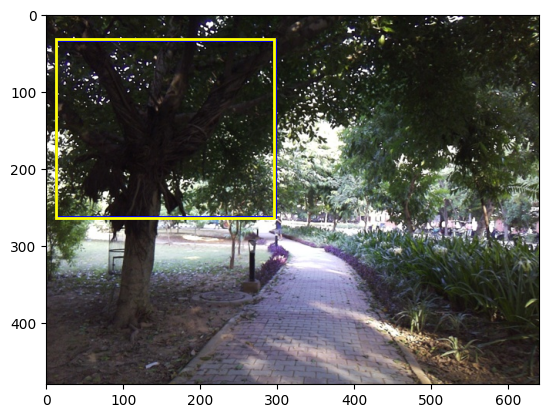

In [13]:
# "C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\Pedestrian_dataset_for_internship_assignment\1997.jpg"
bbox_lis = [[297, 262, 12, 33], [296, 263, 12, 31]]
image = plt.imread(r"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\Pedestrian_dataset_for_internship_assignment\1229.jpg")
fig = plt.imshow(image)
fig.axes.add_patch(bbox_to_rect(bbox_lis[0], 'blue'))
fig.axes.add_patch(bbox_to_rect(bbox_lis[1], 'yellow'))



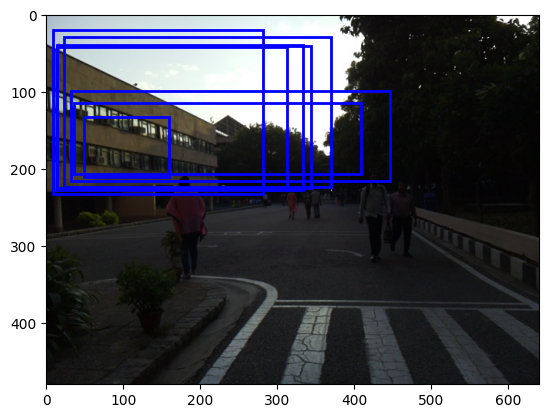

In [14]:
df_199 = df_merged.loc[df_merged['id_x']==199]
image = plt.imread(r"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\Pedestrian_dataset_for_internship_assignment\17679.jpg")
fig = plt.imshow(image)
bbox_lis=[]

for bbox in df_199['bbox']:
    fig.axes.add_patch(bbox_to_rect(bbox, 'blue'))

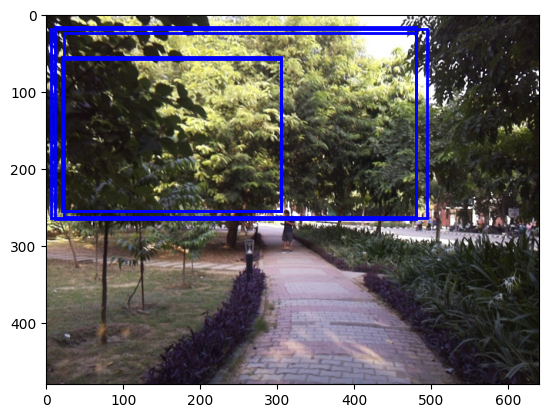

In [15]:
df_199 = df_merged.loc[df_merged['id_x']==4]
image = plt.imread(r"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\Pedestrian_dataset_for_internship_assignment\1287.jpg")
fig = plt.imshow(image)
bbox_lis=[]

for bbox in df_199['bbox']:
    fig.axes.add_patch(bbox_to_rect(bbox, 'blue'))

In [16]:
df_merged

,height_x,width,id_x,file_name,iscrowd,image_id,bbox,segmentation,category_id,id_y,area,ignore,vis_ratio,height_y
0,480,640,1,1229.jpg,0,1,"[297, 262, 12, 33]",[],1,1,396,0,1.0,33
1,480,640,1,1229.jpg,0,1,"[296, 263, 12, 31]",[],1,2,372,0,1.0,31
2,480,640,2,1234.jpg,0,2,"[346, 265, 12, 33]",[],1,3,396,0,1.0,33
3,480,640,2,1234.jpg,0,2,"[344, 265, 12, 32]",[],1,4,384,0,1.0,32
4,480,640,3,1254.jpg,0,3,"[608, 286, 21, 21]",[],1,5,441,1,1.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,480,640,199,17679.jpg,0,199,"[312, 226, 14, 41]",[],1,1367,574,0,1.0,41
1367,480,640,199,17679.jpg,0,199,"[333, 227, 14, 39]",[],1,1368,546,0,1.0,39
1368,480,640,199,17679.jpg,0,199,"[344, 225, 14, 40]",[],1,1369,560,0,1.0,40
1369,480,640,199,17679.jpg,0,199,"[408, 206, 36, 114]",[],1,1370,4104,0,1.0,114


In [17]:
df

,height,width,id,file_name
0,480,640,1,1229.jpg
1,480,640,2,1234.jpg
2,480,640,3,1254.jpg
3,480,640,4,1287.jpg
4,480,640,5,1292.jpg
...,...,...,...,...
194,480,640,195,17156.jpg
195,480,640,196,17526.jpg
196,480,640,197,17645.jpg
197,480,640,198,17677.jpg


In [18]:
df_sampled = df.sample(frac=1)
df_sampled

,height,width,id,file_name
78,480,640,79,8466.jpg
115,480,640,116,11283.jpg
29,480,640,30,4238.jpg
46,480,640,47,5879.jpg
2,480,640,3,1254.jpg
...,...,...,...,...
190,480,640,191,17065.jpg
100,480,640,101,1088.jpg
44,480,640,45,5744.jpg
13,480,640,14,3237.jpg


In [19]:
ratio = 0.8
total_rows = df_sampled.shape[0]
train_size = int(total_rows*ratio)

train = df_sampled[0:train_size]
validation = df_sampled[train_size:]

In [20]:
train

,height,width,id,file_name
78,480,640,79,8466.jpg
115,480,640,116,11283.jpg
29,480,640,30,4238.jpg
46,480,640,47,5879.jpg
2,480,640,3,1254.jpg
...,...,...,...,...
58,480,640,59,6576.jpg
183,480,640,184,16128.jpg
36,480,640,37,5235.jpg
197,480,640,198,17677.jpg


In [21]:
validation

,height,width,id,file_name
193,480,640,194,17143.jpg
153,480,640,154,13957.jpg
18,480,640,19,3333.jpg
25,480,640,26,3516.jpg
101,480,640,102,10957.jpg
24,480,640,25,3512.jpg
12,480,640,13,1997.jpg
173,480,640,174,15349.jpg
33,480,640,34,4312.jpg
65,480,640,66,7065.jpg


In [22]:
# validation = validation.reset_index()
# train = train.reset_index()

In [23]:
train_files = []
for i in train['file_name']:
    train_files.append(i)

In [24]:
train_ids  = []
for i in train['id']:
    train_ids.append(i)

In [25]:
val_files = []
for v in validation['file_name']:
    val_files.append(v)

In [26]:
val_ids = []
for v in validation['id']:
    val_ids.append(v)

In [27]:
import os
import shutil

In [30]:
rootdir = r"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\Pedestrian_dataset_for_internship_assignment"
dest_dir = r"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\COCODIR\train2017"

for file in os.listdir(rootdir):
    if (file.endswith(".jpg")):
        if file in train_files:
            src_path = os.path.join(rootdir, file)
            dest_path = os.path.join(dest_dir, file)
            shutil.copy(src_path, dest_path)

In [31]:
rootdir = r"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\Pedestrian_dataset_for_internship_assignment"
dest_dir = r"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\COCODIR\val2017"

for file in os.listdir(rootdir):
    if (file.endswith(".jpg")):
        if file in val_files:
            src_path = os.path.join(rootdir, file)
            dest_path = os.path.join(dest_dir, file)
            shutil.copy(src_path, dest_path)

In [32]:
df2

,iscrowd,image_id,bbox,segmentation,category_id,id,area,ignore,vis_ratio,height
0,0,1,"[297, 262, 12, 33]",[],1,1,396,0,1.0,33
1,0,1,"[296, 263, 12, 31]",[],1,2,372,0,1.0,31
2,0,2,"[346, 265, 12, 33]",[],1,3,396,0,1.0,33
3,0,2,"[344, 265, 12, 32]",[],1,4,384,0,1.0,32
4,0,3,"[608, 286, 21, 21]",[],1,5,441,1,1.0,21
...,...,...,...,...,...,...,...,...,...,...
1366,0,199,"[312, 226, 14, 41]",[],1,1367,574,0,1.0,41
1367,0,199,"[333, 227, 14, 39]",[],1,1368,546,0,1.0,39
1368,0,199,"[344, 225, 14, 40]",[],1,1369,560,0,1.0,40
1369,0,199,"[408, 206, 36, 114]",[],1,1370,4104,0,1.0,114


In [33]:
data

{'images': [{'height': 480, 'width': 640, 'id': 1, 'file_name': '1229.jpg'},
  {'height': 480, 'width': 640, 'id': 2, 'file_name': '1234.jpg'},
  {'height': 480, 'width': 640, 'id': 3, 'file_name': '1254.jpg'},
  {'height': 480, 'width': 640, 'id': 4, 'file_name': '1287.jpg'},
  {'height': 480, 'width': 640, 'id': 5, 'file_name': '1292.jpg'},
  {'height': 480, 'width': 640, 'id': 6, 'file_name': '1298.jpg'},
  {'height': 480, 'width': 640, 'id': 7, 'file_name': '1313.jpg'},
  {'height': 480, 'width': 640, 'id': 8, 'file_name': '1335.jpg'},
  {'height': 480, 'width': 640, 'id': 9, 'file_name': '1898.jpg'},
  {'height': 480, 'width': 640, 'id': 10, 'file_name': '1901.jpg'},
  {'height': 480, 'width': 640, 'id': 11, 'file_name': '1904.jpg'},
  {'height': 480, 'width': 640, 'id': 12, 'file_name': '1960.jpg'},
  {'height': 480, 'width': 640, 'id': 13, 'file_name': '1997.jpg'},
  {'height': 480, 'width': 640, 'id': 14, 'file_name': '3237.jpg'},
  {'height': 480, 'width': 640, 'id': 15, 'file

In [45]:
train_data = {}
train_data['images'] = []
train_data['annotations'] = []
imgs = data['images']
anns = data['annotations']
for i in anns:
    if i['image_id'] in train_ids:
        train_data['annotations'].append(i)
for j in imgs:
    if j['id'] in train_ids:
        train_data['images'].append(j)
with open(r"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\COCODIR\annotations\instances_train2017.json", "w") as outfile:
    json.dump(train_data, outfile)

In [46]:
val_data = {}
val_data['images'] = []
val_data['annotations'] = []
img = data['images']
anns = data['annotations']
for i in anns:
    if i['image_id'] in val_ids:
        val_data['annotations'].append(i)
for j in imgs:
    if j['id'] in val_ids:
        val_data['images'].append(j)
with open(r"C:\Users\hp\Downloads\Pedestrian_dataset_for_internship_assignment\COCODIR\annotations\instances_val2017.json", "w") as outfile:
    json.dump(val_data, outfile)

In [44]:
val_data

{'images': [{'iscrowd': 0,
   'image_id': 2,
   'bbox': [346, 265, 12, 33],
   'segmentation': [],
   'category_id': 1,
   'id': 3,
   'area': 396,
   'ignore': 0,
   'vis_ratio': 1.0,
   'height': 33},
  {'iscrowd': 0,
   'image_id': 2,
   'bbox': [344, 265, 12, 32],
   'segmentation': [],
   'category_id': 1,
   'id': 4,
   'area': 384,
   'ignore': 0,
   'vis_ratio': 1.0,
   'height': 32},
  {'iscrowd': 0,
   'image_id': 7,
   'bbox': [568, 283, 13, 19],
   'segmentation': [],
   'category_id': 1,
   'id': 28,
   'area': 247,
   'ignore': 1,
   'vis_ratio': 1.0,
   'height': 19},
  {'iscrowd': 0,
   'image_id': 7,
   'bbox': [584, 280, 8, 22],
   'segmentation': [],
   'category_id': 1,
   'id': 29,
   'area': 176,
   'ignore': 0,
   'vis_ratio': 1.0,
   'height': 22},
  {'iscrowd': 0,
   'image_id': 7,
   'bbox': [303, 285, 10, 22],
   'segmentation': [],
   'category_id': 1,
   'id': 30,
   'area': 220,
   'ignore': 0,
   'vis_ratio': 1.0,
   'height': 22},
  {'iscrowd': 0,
   'im